In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [58]:
data = pd.read_csv('./csv/USD_IDR-Data.csv')
data.head()

Date     Price      Open      High       Low Change %
0  Jul 12, 2019  14,007.0  14,073.0  14,098.0  14,003.0   -0.41%
1  Jul 11, 2019  14,065.0  14,100.0  14,105.0  14,050.0   -0.46%
2  Jul 10, 2019  14,130.0  14,135.0  14,155.0  14,130.0    0.00%
3  Jul 09, 2019  14,130.0  14,105.0  14,135.0  14,105.0    0.14%
4  Jul 08, 2019  14,110.0  14,115.0  14,155.0  14,095.0    0.20%

In [59]:
data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')

In [60]:
selection = ['Price', 'Open', 'High', 'Low']

In [61]:
selectedData = data[selection]
selectedData.columns

Index(['Price', 'Open', 'High', 'Low'], dtype='object')

In [62]:
selectedData.head()

Price      Open      High       Low
0  14,007.0  14,073.0  14,098.0  14,003.0
1  14,065.0  14,100.0  14,105.0  14,050.0
2  14,130.0  14,135.0  14,155.0  14,130.0
3  14,130.0  14,105.0  14,135.0  14,105.0
4  14,110.0  14,115.0  14,155.0  14,095.0

In [63]:
def cleanUpDF(df):
    for data in df.iterrows():
        for key in data[1].keys():
            type(data[1][key])
            val = data[1][key].replace(",","")
            data[1][key] = float(val)

cleanUpDF(selectedData)
selectedData.head()

Price   Open   High    Low
0  14007  14073  14098  14003
1  14065  14100  14105  14050
2  14130  14135  14155  14130
3  14130  14105  14135  14105
4  14110  14115  14155  14095

In [67]:
# Scale using Standard Scaling
dataScale = StandardScaler().fit_transform(selectedData)
dataScale

array([[ 0.27539791,  0.40354396,  0.39974935,  0.30637991],
       [ 0.37837294,  0.4514733 ,  0.41203696,  0.39033387],
       [ 0.493776  ,  0.51360391,  0.49980559,  0.53323423],
       ...,
       [-1.27189071, -1.26776961, -1.24415699, -1.2503409 ],
       [-1.24170838, -1.24824284, -1.25117848, -1.23962337],
       [-1.23549437, -1.21540237, -1.21870409, -1.21550893]])

In [73]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(dataScale)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [74]:
centers = model.cluster_centers_
centers

array([[ 0.15551682,  0.15488343,  0.15366563,  0.15774369],
       [-0.93610778, -0.93437228, -0.93974468, -0.93039145],
       [ 1.81106553,  1.8068621 ,  1.81423383,  1.80117723],
       [ 1.04325728,  1.0479065 ,  1.05342959,  1.04417745],
       [-0.17084836, -0.17471456, -0.18439264, -0.16482978],
       [-1.43412078, -1.43738619, -1.41982589, -1.44325638],
       [ 2.37986477,  2.37492792,  2.35783361,  2.39897707],
       [ 0.46257175,  0.46411615,  0.4714849 ,  0.45332011],
       [-0.53873146, -0.53904535, -0.54511603, -0.53687932],
       [ 1.32249728,  1.32819031,  1.3200797 ,  1.32425374],
       [ 0.74750419,  0.74082445,  0.75151346,  0.74299155],
       [-0.75327975, -0.75393462, -0.74643574, -0.76466574]])

In [75]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [76]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [78]:
res = pd_centers(selection, centers)
res

Price      Open      High       Low  prediction
0   0.155517  0.154883  0.153666  0.157744           0
1  -0.936108 -0.934372 -0.939745 -0.930391           1
2   1.811066  1.806862  1.814234  1.801177           2
3   1.043257  1.047906  1.053430  1.044177           3
4  -0.170848 -0.174715 -0.184393 -0.164830           4
5  -1.434121 -1.437386 -1.419826 -1.443256           5
6   2.379865  2.374928  2.357834  2.398977           6
7   0.462572  0.464116  0.471485  0.453320           7
8  -0.538731 -0.539045 -0.545116 -0.536879           8
9   1.322497  1.328190  1.320080  1.324254           9
10  0.747504  0.740824  0.751513  0.742992          10
11 -0.753280 -0.753935 -0.746436 -0.764666          11

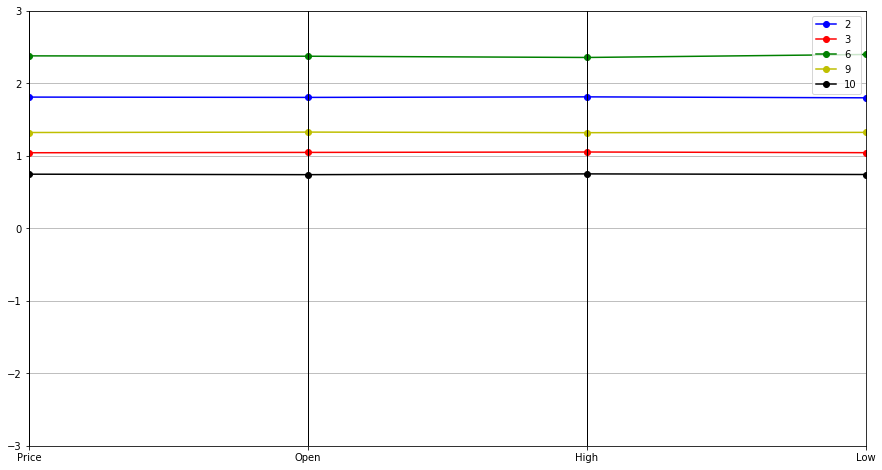

In [83]:
parallel_plot(res[res['Price'] > 0.5])